In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import seaborn as sns
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix

In [4]:
cifar10 = tf.keras.datasets.cifar10

In [5]:
(X_train, y_train) , (X_test, y_test) = cifar10.load_data() 

In [6]:
print(X_train.shape)

(50000, 32, 32, 3)


In [7]:
print(X_test.shape)

(10000, 32, 32, 3)


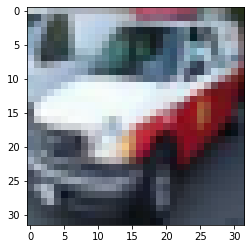

In [8]:
import matplotlib.pyplot as plt

plt.imshow(X_train[60,:])

In [9]:
X_train = X_train[:,:,:,1]
X_test = X_test[:,:,:,1]

In [10]:
print( X_train.shape )
print( X_test.shape )

(50000, 32, 32)
(10000, 32, 32)


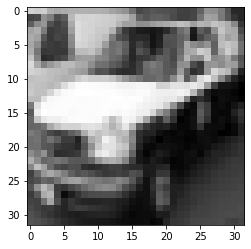

In [11]:
plt.imshow(X_train[60,:], cmap='gray')

In [12]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1 )
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1 )

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [14]:
X_train = X_train / 255
X_test = X_test / 255 

In [15]:
y_test[0:2]

array([[3],
       [8]], dtype=uint8)

In [16]:
num_classes = 10
y_test = tf.keras.utils.to_categorical(y_test,num_classes)

In [17]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes)

In [18]:
y_test[0:2]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [25]:
# 3 camadas convolucionas (32 filtros na primeira camada, 64 na segunda e 128 na terceira)  
# 3 camadas de max pooling
# 1 camada de flattening
# Full connection (MLP) => 1 camada oculta de 80 neurônios

# Dropout => realiza o desligamento temporário de alguns neurônios, baseado na porcentagem indicada
# O dropout faz com que alguns neurônios aprendam mais sobre determinadas caracteríticas do que outros, 
# durante o treinamento. Alguns neurônios ficam mais especializados em determinadas características.
# O dropout também ajuda a rede a não decorar, evitando o overfitting. 

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(60, (3,3), input_shape=(32,32,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add(tf.keras.layers.Conv2D(120, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add(tf.keras.layers.Conv2D(240, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add(tf.keras.layers.Flatten())
# Hidden layer
model.add(tf.keras.layers.Dense(80, activation='relu'))
# Output layer
# num_classes = 10 (resultados possíveis)
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
model.compile(tf.keras.optimizers.Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [26]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 60)        600       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 60)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 120)       64920     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 120)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 240)         259440    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 240)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 960)              

In [ ]:
# 100 épocas
# Validação com 10% dos dados no final das épocas

history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=40, verbose=1, shuffle=1)

## **Avaliação do treinamento** 

Text(0.5, 0, 'Epoch')

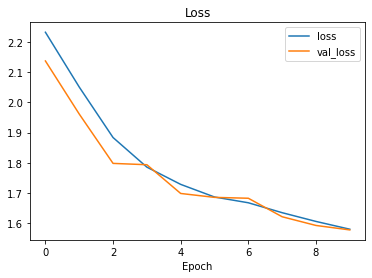

In [ ]:
# loss => é o valor da função custo para o conjunto de treino
# val_loss => é valor da função custo o cross-validation 
# Quanto menor esses valores melhor o resultado

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

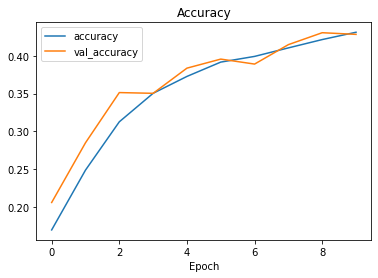

In [ ]:
# accuracy => é o valor da acurácia para o conjunto de treino
# val_accuracy => é valor da acurácia para o cross-validation 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')

In [ ]:
# Label Names(not gaven as metadata)
Label_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
    ]
y_pred = np.argmax(model.predict(X_test), axis=1)   
y_label = np.argmax(y_test,axis=1)

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, 
                           figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),
                                 rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                                 ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

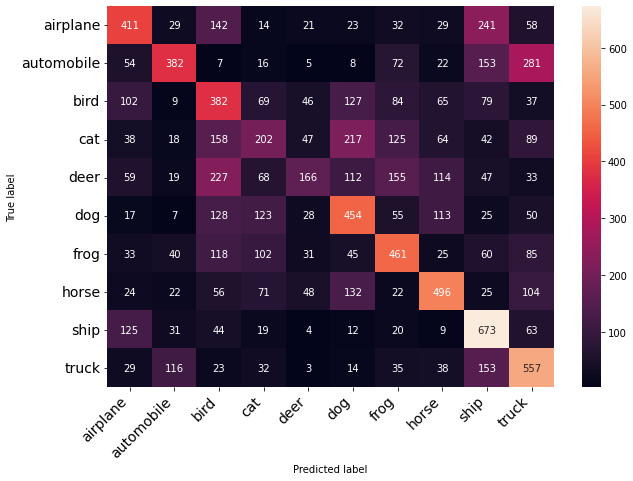

In [ ]:
print_confusion_matrix(confusion_matrix(y_label, y_pred), 
                       Label_names)